<a href="https://colab.research.google.com/github/hernandezhdd/TrabajosMachineLearning/blob/master/TP4/ML_TP4_ProjectBCD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyecto cancer de mama

In [ ]:
import pandas as pd
import numpy as np

#leemos el dataset
cancer_tissues = pd.read_csv("https://raw.githubusercontent.com/emmanueliarussi/DataScienceCapstone/master/3_MidtermProjects/ProjectBCD/data/data.csv")

cancer_tissues = cancer_tissues.drop(['Unnamed: 32'], axis=1)

cancer_tissues['diagnosis_to_number'] = cancer_tissues['diagnosis']

mask_benign = (cancer_tissues['diagnosis'] == 'B')
mask_malign = (cancer_tissues['diagnosis'] == 'M')

cancer_tissues.loc[mask_benign, 'diagnosis_to_number'] = np.real(0)
cancer_tissues.loc[mask_malign, 'diagnosis_to_number'] = np.real(1)

cancer_tissues['diagnosis_to_number'] = cancer_tissues['diagnosis_to_number'].astype('int')

cancer_tissues.head(1)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis_to_number
0,842302,M,17.99,10.38,122.8,1001.0,0.1184,0.2776,0.3001,0.1471,0.2419,0.07871,1.095,0.9053,8.589,153.4,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.1189,1


# Visualizo los datos

<Figure size 432x288 with 0 Axes>

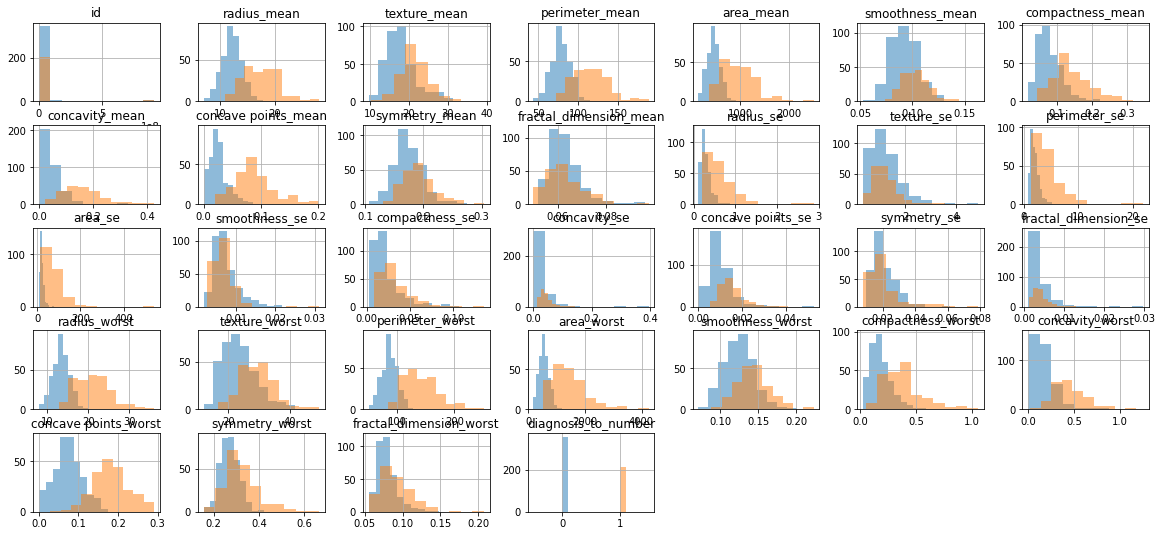

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

length=32
plt.figure()

axes = cancer_tissues.loc[mask_benign].hist(layout=(5,7), alpha=0.5, figsize=(20,9))

cancer_tissues.loc[mask_malign].hist(ax=axes.ravel()[:length], alpha=0.5)

plt.show()

Se ve una buena diferencia en muchas caracteristicas, voy a graficar de nuevo sólo aquellos que parecen mas diferenciados.

<Figure size 432x288 with 0 Axes>

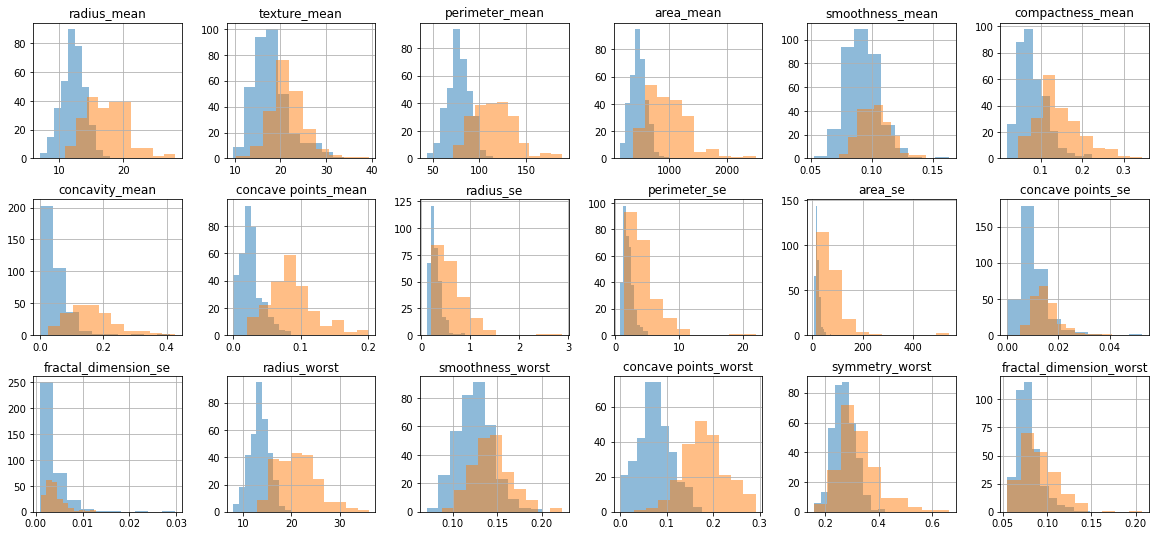

In [ ]:
columnas_importantes = ['radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'radius_se', 'perimeter_se', 'area_se',
       'concave points_se', 'fractal_dimension_se', 'radius_worst',
       'smoothness_worst','concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']
       
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

length2=18
plt.figure()

axes = cancer_tissues[columnas_importantes].loc[mask_benign].hist(layout=(3,6), alpha=0.5, figsize=(20,9))

cancer_tissues[columnas_importantes].loc[mask_malign].hist(ax=axes.ravel()[:length2], alpha=0.5)

plt.show()

<Figure size 432x288 with 0 Axes>

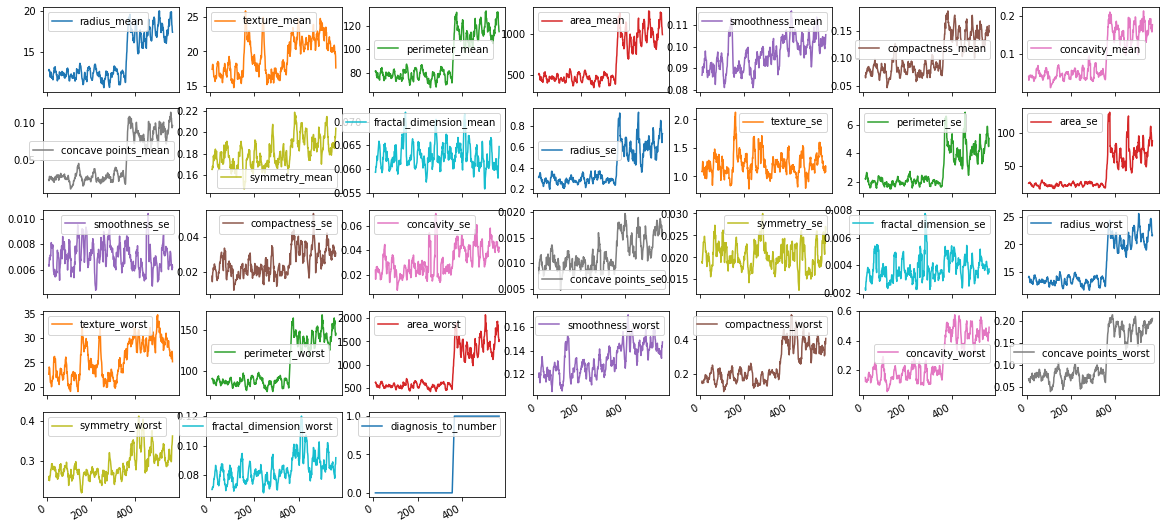

In [ ]:
import matplotlib.pyplot as plt

df = cancer_tissues.sort_values(by='diagnosis_to_number')
df = df.reset_index()

plt.figure()
df.drop(columns=['index','id']).rolling(10).mean().plot(subplots=True, legend=True, figsize=(20,10), layout=(5, 7))
plt.show() 

En estos graficos lo que está a la izquierda tiene target 0 y lo que está a la derecha tiene target 1. Se ven un salto importante en muchas caracteristicas cuando cambia el target.

<Figure size 432x288 with 0 Axes>

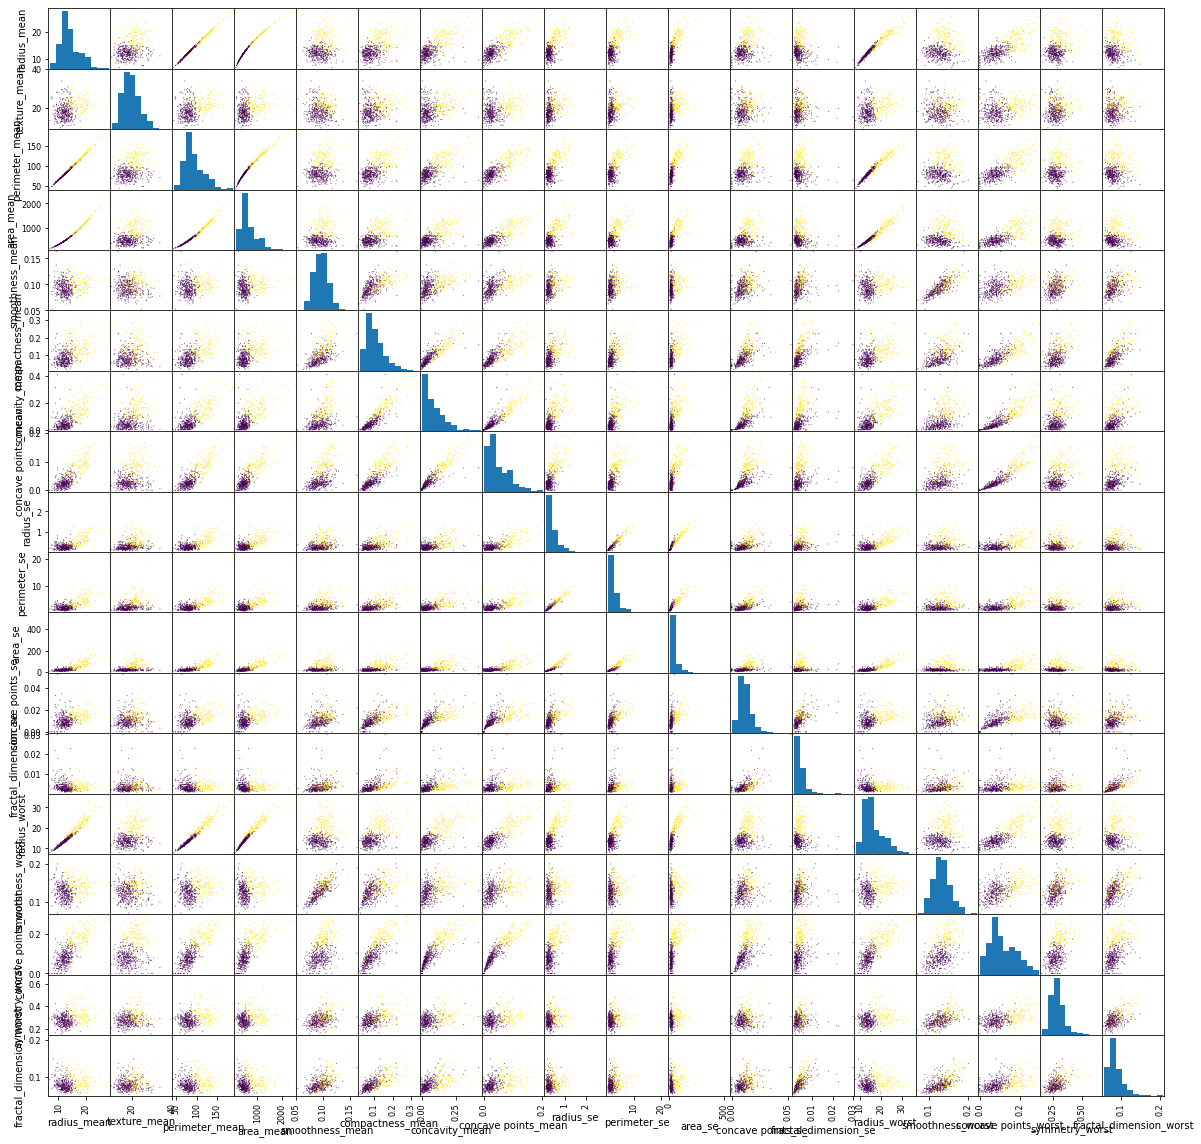

In [ ]:
import matplotlib.pyplot as plt

plt.figure()
pd.plotting.scatter_matrix(cancer_tissues[columnas_importantes], c=cancer_tissues['diagnosis_to_number'], figsize=(20,20), marker = 'o', hist_kwds = {'bins': 10}, s = 1, alpha = 0.8)
plt.show()

Está casi inmirable el grafico, pero se puede ver como en las que marqué como columnas importantes (que son todas las que grafique aca) los puntos malignos y benignos forman conjuntos bastante bien diferenciados. Tabién se puede ver entre ciertas variables una funcionalidad muy marcada (en 6 combinaciones está muy marcada) y en otros también está pero no tan marcada. Tiene sentido ya que hay varias propiedades de un mismo atributo como radio medio, radio peor, etc, y ademas hay varias propiedades geometricas relacionadas como radio y area. Entonces hay variables que son comb. lineal de otras, y por lo tanto sobran, sacandolas se reduciría la dimensionalidad. Todo parece tener una funcionalidadd bastante lineal, asi que se podría hacer una grilla o matriz con los R(pearson) entre variables y descartar los que tengan mayor a cierto umbral, por ej. 0.8.

#Quito variables que no sirven

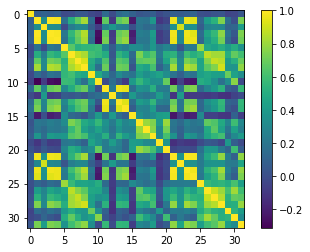

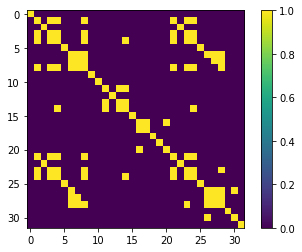

In [ ]:
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots()
# ax.imshow(data, cmap=cmap, norm=norm)
pos = ax1.imshow(cancer_tissues.corr())
fig.colorbar(pos, ax=ax1)
plt.show()

fig2, ax2 = plt.subplots()
# ax.imshow(data, cmap=cmap, norm=norm)
pos2 = ax2.imshow(cancer_tissues.corr().abs()>0.8)
fig2.colorbar(pos2, ax=ax2)
plt.show()

En el video de la clase 4, el profesor comenta que ciertos metodo aseguran llegar a una solucion si las variables son separables. Como acá ciertas varibles no son separables (tienen una funcionalidad, no son independientes), no se si sólo sobran, o también serían un problema para la convergencia de los métodos.

Si quiero sacaar las features correlacionadas uso esto de aca:

 https://stackoverflow.com/questions/29294983/how-to-calculate-correlation-between-all-columns-and-remove-highly-correlated-on

Quizas deberia tener mas cuidado al elegir con cual columna quedarme...

In [ ]:
import numpy as np

# Create correlation matrix
df_sin_correl = cancer_tissues.copy()
corr_matrix = df_sin_correl.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find features with correlation greater than 0.9
to_drop = [column for column in upper.columns if any(upper[column] > 0.9)]

# Drop features 
df_sin_correl.drop(to_drop, axis=1, inplace=True)

fig, ax1 = plt.subplots()
# ax.imshow(data, cmap=cmap, norm=norm)
pos = ax1.imshow(df_sin_correl.corr())
fig.colorbar(pos, ax=ax1)
plt.show()

NameError: ignored

De las 32 originales quedaron 22.

In [ ]:
df_sin_correl.head(1)

,id,diagnosis,radius_mean,texture_mean,smoothness_mean,compactness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,smoothness_worst,compactness_worst,concavity_worst,symmetry_worst,fractal_dimension_worst,diagnosis_to_number
0,842302,M,17.99,10.38,0.1184,0.2776,0.3001,0.2419,0.07871,1.095,0.9053,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,0.1622,0.6656,0.7119,0.4601,0.1189,1


<Figure size 432x288 with 0 Axes>

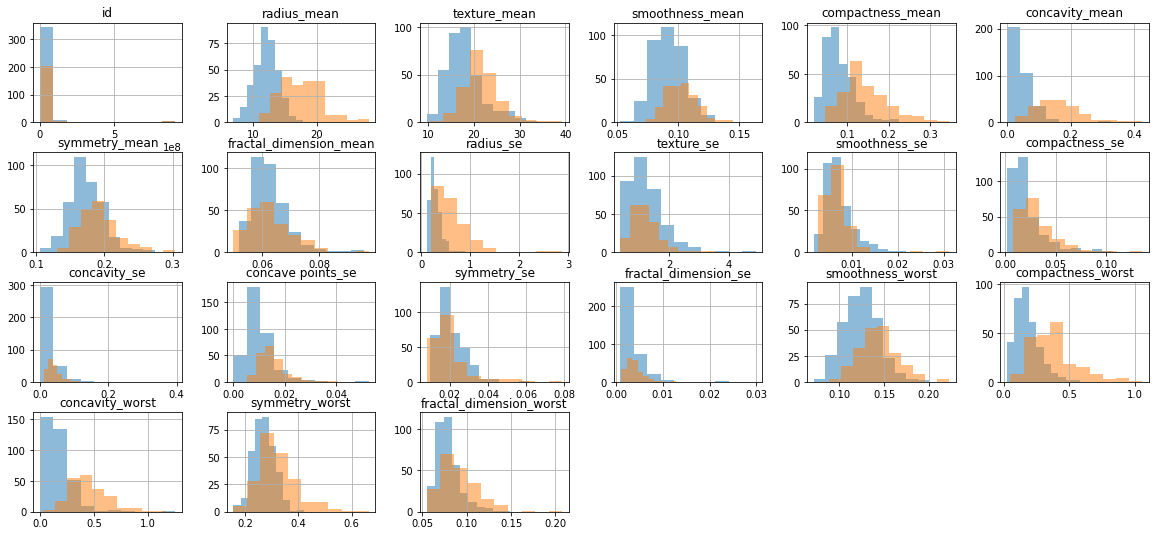

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

length=21
plt.figure()

axes = df_sin_correl.loc[mask_benign].hist(layout=(4,6), alpha=0.5, figsize=(20,9))

df_sin_correl.loc[mask_malign].hist(ax=axes.ravel()[:length], alpha=0.5)

plt.show()

#Hago KNN

Tengo que ver como reescalar los datos. La mayoría no tiene forma de gaussiana, pero lo voy a usar igual al rescaler gaussiano. 

  Segun https://scikit-learn.org/stable/modules/preprocessing.html
lo mas comun es estandarizar todo como si fueran gaussianas. Si fuera necesario, en la misma página hay metodos para transformar distribuciones asimetricas en gaussianas. Seguramente seria lo mejor para varias columnas.

In [ ]:
from sklearn.model_selection import train_test_split

df = df_sin_correl.copy()
df = df.drop(['id','diagnosis'], axis=1)

X = df.drop(columns=['diagnosis_to_number'], axis=1).to_numpy()
y = df['diagnosis_to_number'].to_numpy().astype('int')

In [ ]:
#Esto seria para transformar las dists asimetricas en gaussianas

# from sklearn import preprocessing

# pt = preprocessing.PowerTransformer(method='box-cox', standardize=False)

Tengo entendido que al escalar hay que hacerlo usando los datos de entrenamiento,
 para evitar que cierta informacion pase del dataset test al train.
  Pero luego eso habría que hacerlo dentro de gridsearch, por lo que por
ahora ajusto todo el dataset.


Para escalar dentro de gridsearch hay que usar un pipeline, pero me supera:

https://stackoverflow.com/questions/56707471/how-do-i-a-correctly-use-a-scaler-while-using-gridsearchcv-with-timeseriessplit

In [ ]:
from sklearn import preprocessing

#ajusto el escalador a los datos 
scaler = preprocessing.StandardScaler().fit(X)
#reescalo los datos
X = scaler.transform(X)

data_train_sobre_total = 0.5

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size= data_train_sobre_total, random_state=10)
 #Calculo para diferente cantidad de vecinos, desde 1 hasta sqrt(datos_train)+4

Esta parte es un robo del siguiente kaggle:

https://www.kaggle.com/amolbhivarkar/knn-for-classification-using-scikit-learn

In [ ]:
#import GridSearchCV
from sklearn.model_selection import GridSearchCV
#import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import neighbors, datasets

#In case of classifier like knn the parameter to be tuned is n_neighbors
#Va a ver cual es el mejor nro de vecinos.
# Para eso hace un dicc.

param_grid = {'n_neighbors':np.arange(1,np.floor( 2 * np.sqrt(y.shape[0] * data_train_sobre_total) ).astype('int'),1)}

In [ ]:
knn = KNeighborsClassifier()
#Aparentemente acá le dice a GridSearch que haga knn, 
#pasandole los valores de n_neighbors que necesita knn
# del dicc param_grid, y ¿cv=5? Cantidad de particiones.

k_folds = 5 #numero de folds

knn_cv= GridSearchCV(knn,param_grid,cv=k_folds)
knn_cv.fit(X,y)

GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
#Ahora se fija cual fue la mejor accuracy
print('best acc',knn_cv.best_score_)
#y ahora con cuantos vecinos se dio
knn_cv.best_params_

best acc 0.9578171091445429


{'n_neighbors': 9}

No convence mucho, ni se fija si hay una diferencia real con cualquier otro nro de vecinos.

In [ ]:
resultados = pd.DataFrame(knn_cv.cv_results_)
resultados.head(2)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.001410,0.000725,0.005639,0.000917,1,{'n_neighbors': 1},0.947368,0.982456,0.947368,0.903509,0.920354,0.940211,0.026939,15
1,0.000906,0.000025,0.005216,0.000098,2,{'n_neighbors': 2},0.921053,0.964912,0.921053,0.929825,0.938053,0.934979,0.016248,23


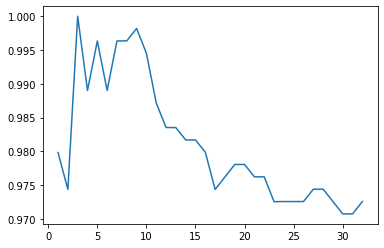

In [ ]:
import matplotlib.pyplot as plt

# A ver en porcentajes:
# plt.plot(resultados.param_n_neighbors, resultados.std_test_score/resultados.std_test_score.max())
plt.plot(resultados.param_n_neighbors, resultados.mean_test_score/resultados.mean_test_score.max())
# plt.ylim((0,1.1))

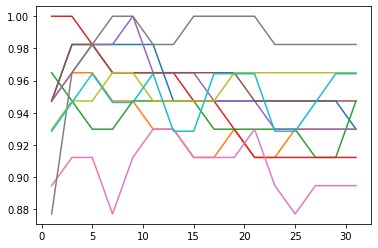

In [ ]:
plt.figure()
for num_test in np.arange(k_folds):
  plt.plot(resultados.param_n_neighbors,resultados['split'+str(num_test)+'_test_score'])
plt.show()

<Figure size 432x288 with 0 Axes>

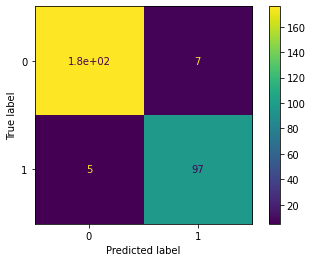

In [ ]:
from sklearn import metrics
# knn_best = KNeighborsClassifier(n_neighbors = knn_cv.best_params_['n_neighbors'])
knn_best = KNeighborsClassifier(n_neighbors = knn_cv.best_params_['n_neighbors'])

knn_best = knn_best.fit(X_train, y_train)
plt.figure()
matriz_conf_1 = metrics.plot_confusion_matrix(knn_best, X_test, y_test)
plt.show()

Parece funcionar bastante bien, pero no creo que sea suficiente dejar pasar 1/10 (con otro split daba 1/6, peor) de los casos de cancer.

In [ ]:
knn = KNeighborsClassifier()
#Aparentemente acá le dice a GridSearch que haga knn, 
#pasandole los valores de n_neighbors que necesita knn
# del dicc param_grid, y ¿cv=5? Cantidad de particiones.

param_grid = {'n_neighbors':np.arange(1,np.floor( 6 * np.sqrt(y.shape[0] * data_train_sobre_total) ).astype('int'),1)}

knn_cv= GridSearchCV(knn,param_grid, cv=k_folds, scoring = ['precision', 'accuracy', 'recall', 'f1','jaccard'], refit=False)
# knn_cv= GridSearchCV(knn,param_grid, cv=k_folds, scoring = 'f1')
knn_cv.fit(X,y)

GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,

In [ ]:
resultados = pd.DataFrame(knn_cv.cv_results_)
resultados.head(2)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_precision,split1_test_precision,split2_test_precision,split3_test_precision,split4_test_precision,mean_test_precision,std_test_precision,rank_test_precision,split0_test_accuracy,split1_test_accuracy,split2_test_accuracy,split3_test_accuracy,split4_test_accuracy,mean_test_accuracy,std_test_accuracy,rank_test_accuracy,split0_test_recall,split1_test_recall,split2_test_recall,split3_test_recall,split4_test_recall,mean_test_recall,std_test_recall,rank_test_recall,split0_test_f1,split1_test_f1,split2_test_f1,split3_test_f1,split4_test_f1,mean_test_f1,std_test_f1,rank_test_f1,split0_test_jaccard,split1_test_jaccard,split2_test_jaccard,split3_test_jaccard,split4_test_jaccard,mean_test_jaccard,std_test_jaccard,rank_test_jaccard
0,0.001475,0.000949,0.008428,0.000936,1,{'n_neighbors': 1},0.893617,0.976744,0.973684,0.878049,0.866667,0.917752,0.047701,100,0.947368,0.982456,0.947368,0.903509,0.920354,0.940211,0.026939,15,0.976744,0.976744,0.880952,0.857143,0.928571,0.924031,0.048801,1,0.933333,0.976744,0.925000,0.867470,0.896552,0.919820,0.036693,12,0.875000,0.954545,0.860465,0.765957,0.812500,0.853694,0.063349,12
1,0.000919,0.000039,0.007611,0.000057,2,{'n_neighbors': 2},0.972222,1.000000,0.971429,1.000000,0.948718,0.978474,0.019498,3,0.921053,0.964912,0.921053,0.929825,0.938053,0.934979,0.016248,25,0.813953,0.906977,0.809524,0.809524,0.880952,0.844186,0.041500,46,0.886076,0.951220,0.883117,0.894737,0.913580,0.905746,0.025097,26,0.795455,0.906977,0.790698,0.809524,0.840909,0.828712,0.042880,26


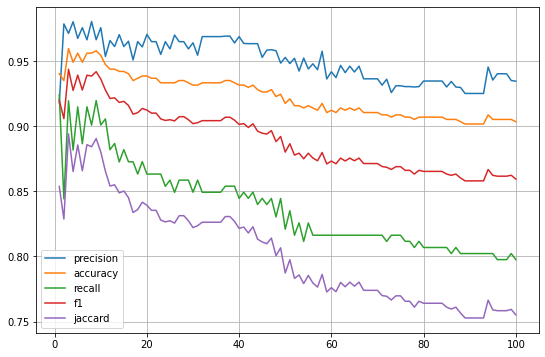

In [ ]:
#reviso que pasa con 'precision', 'recall', 'f1' para los distintos numeros
#de vecinos

plt.figure(figsize=(9,6))
for i in ['precision', 'accuracy', 'recall', 'f1','jaccard']:
  plt.plot(resultados.param_n_neighbors,resultados['mean_test_'+i], label=i)
plt.legend()
plt.grid()
plt.show()

<Figure size 432x288 with 0 Axes>

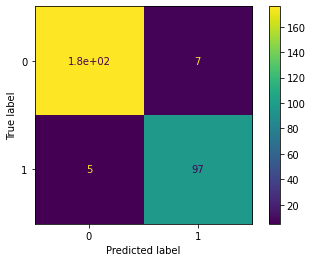

In [ ]:
from sklearn import metrics
# knn_best = KNeighborsClassifier(n_neighbors = knn_cv.best_params_['n_neighbors'])
knn_best = KNeighborsClassifier(n_neighbors = 9)

knn_best = knn_best.fit(X_train, y_train)
plt.figure()
matriz_conf_1 = metrics.plot_confusion_matrix(knn_best, X_test, y_test)
plt.show()

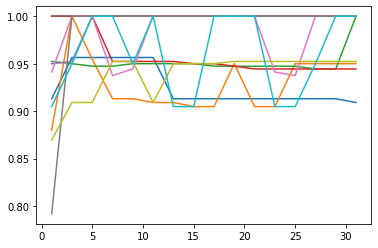

In [ ]:
#reviso los distintos splits por separado para ver como se comportan
plt.figure()
for i in np.arange(k_folds):
  plt.plot(resultados.param_n_neighbors,resultados['split'+str(i)+'_test_precision'])
plt.show()

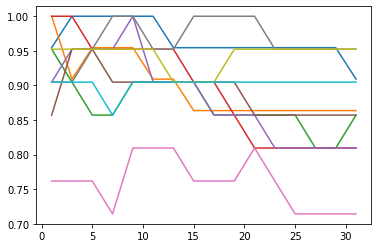

In [ ]:
plt.figure()
for i in np.arange(k_folds):
  plt.plot(resultados.param_n_neighbors,resultados['split'+str(i)+'_test_recall'])
plt.show()

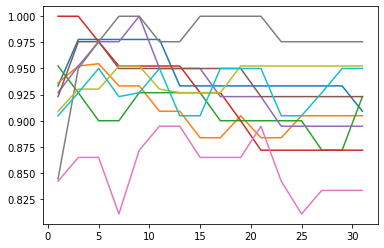

In [ ]:
plt.figure()
for i in np.arange(k_folds):
  plt.plot(resultados.param_n_neighbors,resultados['split'+str(i)+'_test_f1'])
plt.show()

En general estos graficos parecen mas ruido que otra cosa.

A ver probando sin sacar columnas.

In [ ]:
from sklearn.model_selection import train_test_split

df2 = cancer_tissues.copy()
df2 = df2.drop(['id','diagnosis'], axis=1)

X = df.drop(columns=['diagnosis_to_number'], axis=1).to_numpy()
y = df['diagnosis_to_number'].to_numpy().astype('int')

In [ ]:
from sklearn import preprocessing

#ajusto el escalador a los datos 
scaler = preprocessing.StandardScaler().fit(X)
#reescalo los datos
X = scaler.transform(X)

data_train_sobre_total = 0.5

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size= data_train_sobre_total, random_state=10)
 #Calculo para diferente cantidad de vecinos, desde 1 hasta sqrt(datos_train)+4

In [ ]:
#import GridSearchCV
from sklearn.model_selection import GridSearchCV
#import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import neighbors, datasets

#In case of classifier like knn the parameter to be tuned is n_neighbors
#Va a ver cual es el mejor nro de vecinos.
# Para eso hace un dicc.

param_grid = {'n_neighbors':np.arange(1,np.floor( 2 * np.sqrt(y.shape[0] * data_train_sobre_total) ).astype('int'),2)}

In [ ]:
knn = KNeighborsClassifier()
#Aparentemente acá le dice a GridSearch que haga knn, 
#pasandole los valores de n_neighbors que necesita knn
# del dicc param_grid, y ¿cv=5? Cantidad de particiones.

k_folds = 10 #numero de folds

knn_cv= GridSearchCV(knn,param_grid,cv=k_folds)
knn_cv.fit(X,y)

GridSearchCV(cv=10, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
#Ahora se fija cual fue la mejor accuracy
print('best acc',knn_cv.best_score_)
#y ahora con cuantos vecinos se dio
knn_cv.best_params_

best acc 0.963095238095238


{'n_neighbors': 5}

In [ ]:
resultados = pd.DataFrame(knn_cv.cv_results_)
resultados.head(2)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.001427,0.000511,0.003917,0.000978,1,{'n_neighbors': 1},0.947368,0.947368,0.964912,1.0,0.947368,0.947368,0.894737,0.877193,0.929825,0.928571,0.938471,0.032622,13
1,0.001201,0.000053,0.003669,0.000149,3,{'n_neighbors': 3},0.982456,0.964912,0.947368,1.0,0.964912,0.982456,0.912281,0.964912,0.947368,0.946429,0.961310,0.023333,3


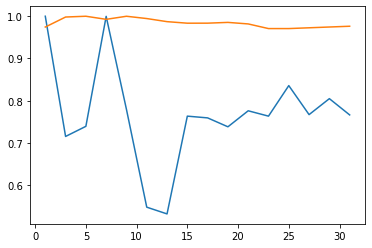

In [ ]:
# A ver en porcentajes:
plt.plot(resultados.param_n_neighbors, resultados.std_test_score/resultados.std_test_score.max())
plt.plot(resultados.param_n_neighbors, resultados.mean_test_score/resultados.mean_test_score.max())
# plt.ylim((0,1.1))

<Figure size 432x288 with 0 Axes>

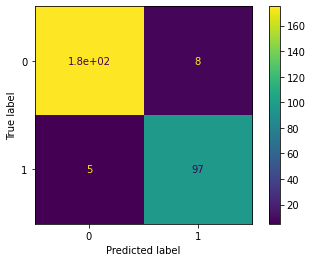

In [ ]:
from sklearn import metrics
# knn_best = KNeighborsClassifier(n_neighbors = knn_cv.best_params_['n_neighbors'])
knn_best = KNeighborsClassifier(n_neighbors = knn_cv.best_params_['n_neighbors'])

knn_best = knn_best.fit(X_train, y_train)
plt.figure()
matriz_conf_1 = metrics.plot_confusion_matrix(knn_best, X_test, y_test)
plt.show()

Da practicamente igual.

# Random Forest

In [ ]:
from sklearn.model_selection import train_test_split

df = df_sin_correl.copy()
df = df.drop(['id','diagnosis'], axis=1)

X = df.drop(columns=['diagnosis_to_number'], axis=1).to_numpy()
y = df['diagnosis_to_number'].to_numpy().astype('int')

In [ ]:
from sklearn import preprocessing

#ajusto el escalador a los datos 
scaler = preprocessing.StandardScaler().fit(X)
#reescalo los datos
X = scaler.transform(X)

data_train_sobre_total = 0.7

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size= data_train_sobre_total, random_state=10)
 #Calculo para diferente cantidad de vecinos, desde 1 hasta sqrt(datos_train)+4

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

<Figure size 432x288 with 0 Axes>

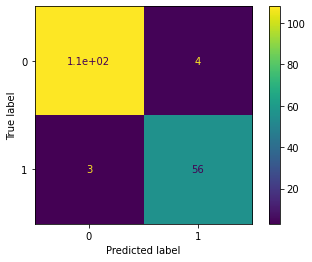

In [ ]:
plt.figure()
matriz_conf_1 = metrics.plot_confusion_matrix(rfc, X_test, y_test)
plt.show()

#Hago SVM

In [ ]:
from sklearn.model_selection import train_test_split

df = df_sin_correl.copy()
df = df.drop(['id','diagnosis'], axis=1)

X = df.drop(columns=['diagnosis_to_number'], axis=1).to_numpy()
y = df['diagnosis_to_number'].to_numpy().astype('int')

In [ ]:
from sklearn import preprocessing

#ajusto el escalador a los datos 
scaler = preprocessing.StandardScaler().fit(X)
#reescalo los datos
X = scaler.transform(X)

data_train_sobre_total = 0.7

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size= data_train_sobre_total, random_state=10)
 #Calculo para diferente cantidad de vecinos, desde 1 hasta sqrt(datos_train)+4

In [ ]:
from sklearn import svm

# Clasificador de soportes vectoriales
classifier = svm.SVC()

# Aprenda a clasificar el conjunto de entrenamiento
classifier.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
# Predecir usando X_test
y_predicted = classifier.predict(X_test)

from sklearn import metrics
print("Classification report for classifier {}\n{}\n".format(classifier, metrics.classification_report(y_test, y_predicted)))

Classification report for classifier SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
              precision    recall  f1-score   support

           0       0.98      0.97      0.98       112
           1       0.95      0.97      0.96        59

    accuracy                           0.97       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.97      0.97      0.97       171




<Figure size 432x288 with 0 Axes>

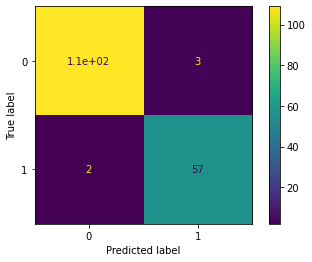

In [ ]:
plt.figure()
matriz_conf_1 = metrics.plot_confusion_matrix(classifier, X_test, y_test)
plt.show()

In [ ]:
#import GridSearchCV
from sklearn.model_selection import GridSearchCV
#import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import neighbors, datasets

#Va a ver cual es el mejor gamma.
# Para eso hace un dicc.

param_grid = {'gamma':[0.0005,0.001,0.002,0.004,0.008,0.016,0.032,0.064,0.128,0.256,0.512,1.024,2.048,4.096,8.192,16,32]}


In [ ]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV

# Clasificador de soportes vectoriales
SVC_classifier = svm.SVC()

# Aprenda a clasificar el conjunto de entrenamiento
SVC_classifier.fit(X_train, y_train)

k_folds = 5

SVC_cv= GridSearchCV(SVC_classifier,param_grid, cv=k_folds, refit=False, scoring = ['precision', 'recall', 'f1'])
# knn_cv= GridSearchCV(knn,param_grid, cv=k_folds, scoring = 'f1')
SVC_cv.fit(X,y)

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined a

GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'gamma': [0.0005, 0.001, 0.002, 0.004, 0.008, 0.016,
                                   0.032, 0.064, 0.128, 0.256, 0.512, 1.024,
                                   2.048, 4.096, 8.192, 16, 32]},
             pre_dispatch='2*n_jobs', refit=False, return_train_score=False,
             scoring=['precision', 'recall', 'f1'], verbose=0)

In [ ]:
resultados = pd.DataFrame(SVC_cv.cv_results_)
resultados.head(2)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_gamma,params,split0_test_precision,split1_test_precision,split2_test_precision,split3_test_precision,split4_test_precision,mean_test_precision,std_test_precision,rank_test_precision,split0_test_recall,split1_test_recall,split2_test_recall,split3_test_recall,split4_test_recall,mean_test_recall,std_test_recall,rank_test_recall,split0_test_f1,split1_test_f1,split2_test_f1,split3_test_f1,split4_test_f1,mean_test_f1,std_test_f1,rank_test_f1
0,0.008980,0.000258,0.004035,0.000064,0.0005,{'gamma': 0.0005},0.914286,1.0,1.0,1.0,1.0,0.982857,0.034286,4,0.744186,0.627907,0.690476,0.738095,0.833333,0.726800,0.067644,10,0.820513,0.771429,0.816901,0.849315,0.909091,0.833450,0.045302,10
1,0.007546,0.000053,0.003785,0.000100,0.001,{'gamma': 0.001},0.894737,1.0,1.0,1.0,1.0,0.978947,0.042105,5,0.790698,0.790698,0.761905,0.833333,0.904762,0.816279,0.049770,9,0.839506,0.883117,0.864865,0.909091,0.950000,0.889316,0.037923,9


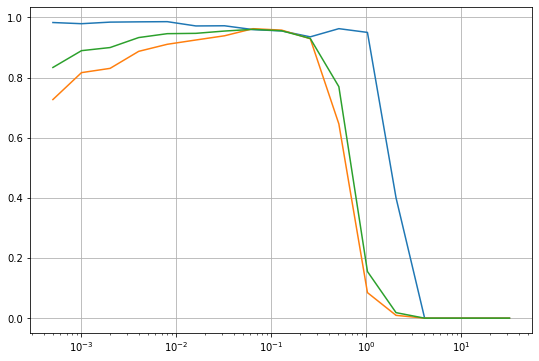

In [ ]:
#reviso que pasa con 'precision', 'recall', 'f1' para los distintos numeros
#de vecinos

plt.figure(figsize=(9,6))
for i in ['precision', 'recall', 'f1']:
# for i in ['score']:
  plt.plot(resultados.param_gamma,resultados['mean_test_'+i])
plt.grid()
plt.xscale('log')
plt.show()

## Observacion

Como es un detector de cancer, voy a intentar minimizar la cantidad de casos que dan benigno y en realidad eran malignos, para eso uso recall.

In [ ]:
from sklearn.model_selection import train_test_split

df = df_sin_correl.copy()
df = df.drop(['id','diagnosis'], axis=1)

X = df.drop(columns=['diagnosis_to_number'], axis=1).to_numpy()
y = df['diagnosis_to_number'].to_numpy().astype('int')

In [ ]:
from sklearn import preprocessing

#ajusto el escalador a los datos 
scaler = preprocessing.StandardScaler().fit(X)
#reescalo los datos
X = scaler.transform(X)

data_train_sobre_total = 0.7

In [ ]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV

# Clasificador de soportes vectoriales
SVC_classifier = svm.SVC()

# Aprenda a clasificar el conjunto de entrenamiento
SVC_classifier.fit(X_train, y_train)

k_folds = 5

SVC_cv= GridSearchCV(SVC_classifier,param_grid, cv=k_folds, scoring = 'recall')
# knn_cv= GridSearchCV(knn,param_grid, cv=k_folds, scoring = 'f1')
SVC_cv.fit(X,y)

GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'gamma': [0.0005, 0.001, 0.002, 0.004, 0.008, 0.016,
                                   0.032, 0.064, 0.128, 0.256, 0.512, 1.024,
                                   2.048, 4.096, 8.192, 16, 32]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='recall', verbose=0)

In [ ]:
resultados = pd.DataFrame(SVC_cv.cv_results_)
resultados.head(2)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.012051,0.000796,0.003486,0.000165,0.01,0.0005,"{'C': 0.01, 'gamma': 0.0005}",0.0,0.0,0.0,0.0,0.0,0.0,0.0,49
1,0.011352,0.001986,0.003145,0.000184,0.01,0.001,"{'C': 0.01, 'gamma': 0.001}",0.0,0.0,0.0,0.0,0.0,0.0,0.0,49


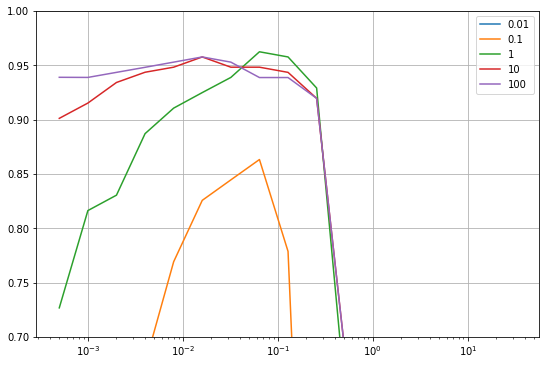

In [ ]:
plt.figure(figsize=(9,6))


for j in resultados.param_C.unique():
  mask = resultados.param_C == j
  plt.plot(resultados.param_gamma.loc[mask],resultados['mean_test_score'].loc[mask],label=j)
plt.grid()
# plt.colorbar()
plt.legend()
plt.xscale('log')
plt.ylim((0.7,1))
plt.show()

In [ ]:
#Ahora se fija cual es el mejor recall
print('best recall',SVC_cv.best_score_)
#y ahora con cuantos vecinos se dio
SVC_cv.best_params_

best recall 0.9623477297895903


{'C': 1, 'gamma': 0.064}

<Figure size 432x288 with 0 Axes>

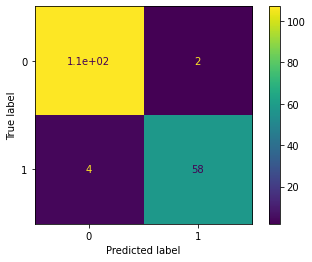

In [ ]:
from sklearn import metrics
# knn_best = KNeighborsClassifier(n_neighbors = knn_cv.best_params_['n_neighbors'])
SVC_best = svm.SVC(gamma = SVC_cv.best_params_['gamma'], C = SVC_cv.best_params_['C'])

SVC_best = SVC_best.fit(X_train, y_train)
plt.figure()
matriz_conf_1 = metrics.plot_confusion_matrix(SVC_best, X_test, y_test)
plt.show()